In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras.datasets import mnist

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [190]:
nou = pd.read_csv('/content/Mobile_price_data/mobile_price_train.csv')
nou.shape

(2000, 21)

In [191]:
nou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [192]:
nou.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## **Preprocessing**

In [193]:
print(nou.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [194]:
nou.duplicated().sum()

np.int64(0)

In [195]:
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in binary_cols:
    print(f"{col} unique values:", nou[col].unique())

blue unique values: [0 1]
dual_sim unique values: [0 1]
four_g unique values: [0 1]
three_g unique values: [0 1]
touch_screen unique values: [0 1]
wifi unique values: [1 0]


## Data Visualization and Feature Engineering

- Displayed correlation matrix between features
- Plotted distributions and boxplots for important numerical features
- Visualized binary feature distributions
- Plotted feature vs target relationships
- Created new features:
  - px_area = Pixel Resolution Area (px_height × px_width)
  - screen_area = Screen Size Area (sc_h × sc_w)
  - battery_per_weight = battery_power ÷ mobile_wt
- Clipped extreme outliers at the 99th percentile to reduce their impact

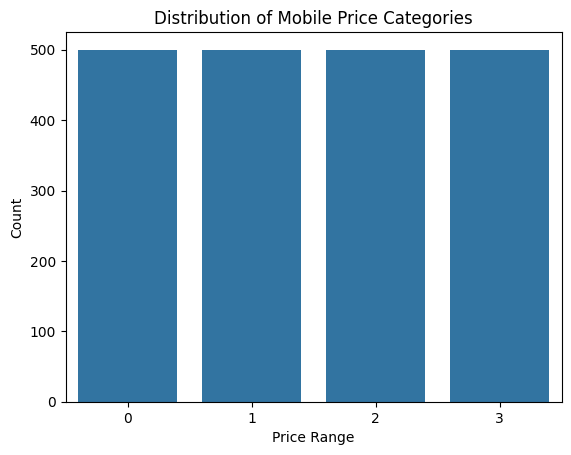

In [196]:
sns.countplot(x=y)
plt.title('Distribution of Mobile Price Categories')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

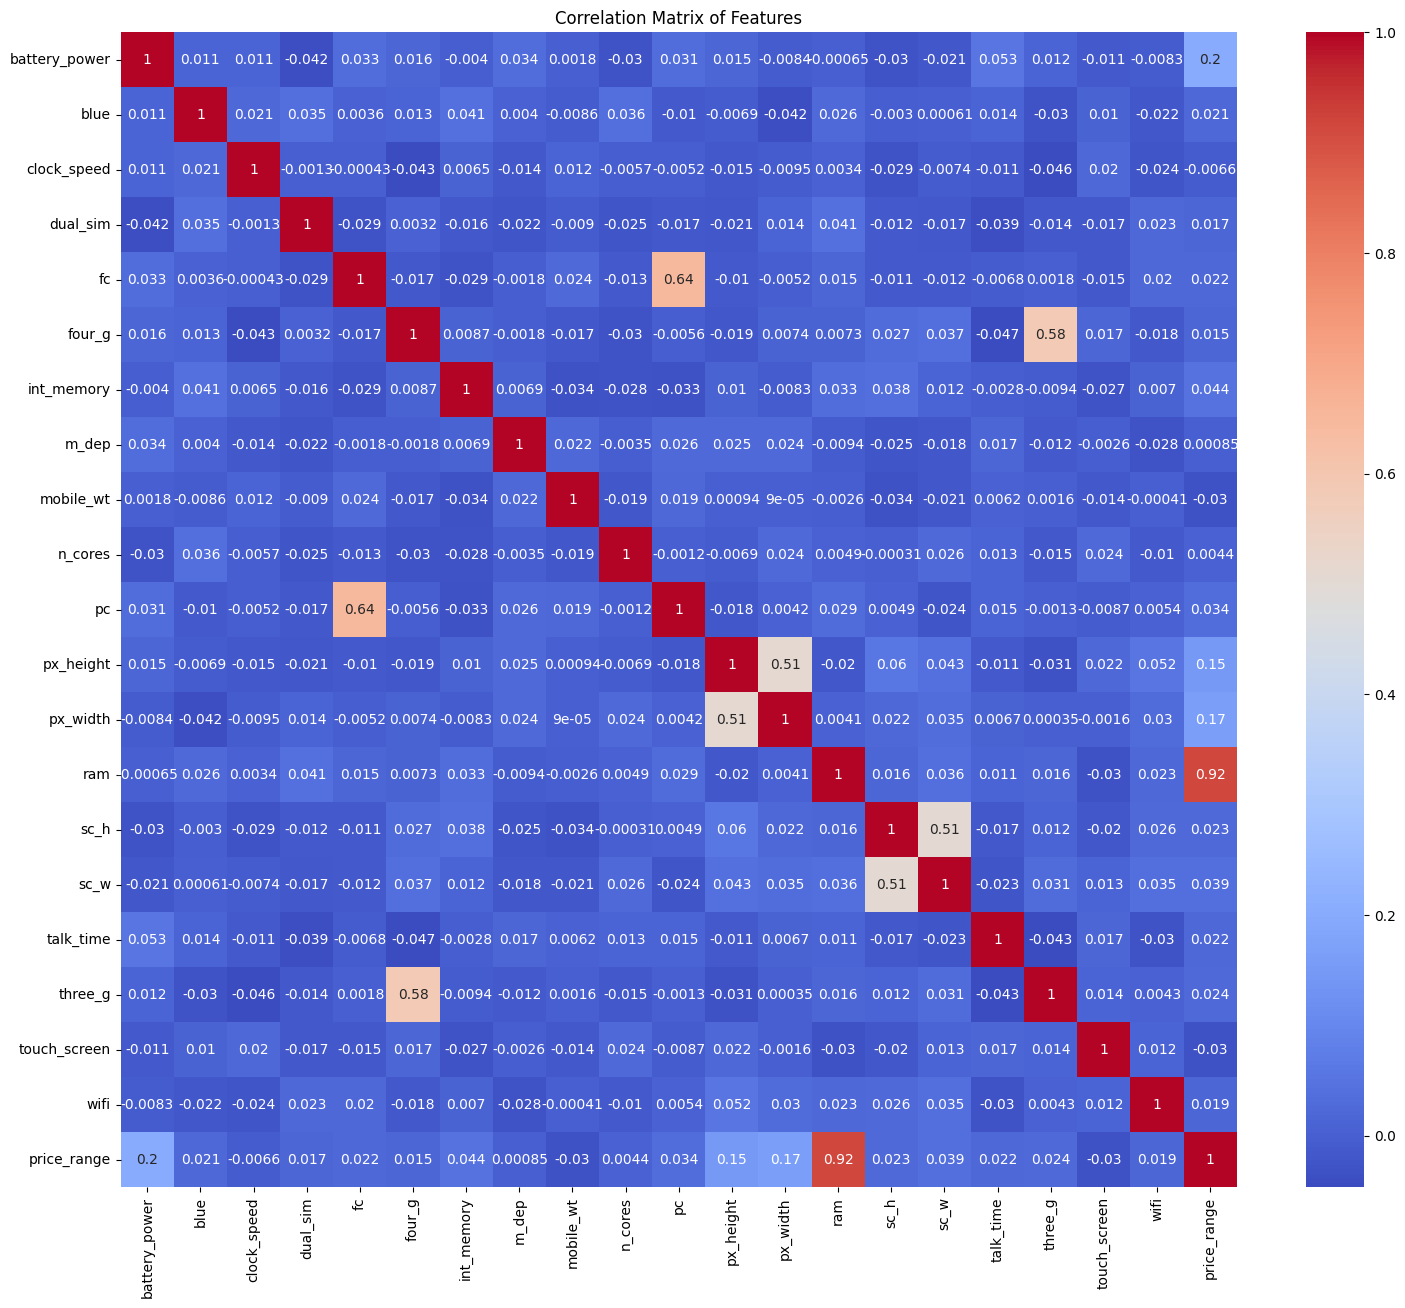

(2000, 21)


In [197]:
plt.figure(figsize=(18, 15))
sns.heatmap(nou.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()
print(nou.shape)

In [209]:
#Correlation with Target
correlations = nou.corr()['price_range'].sort_values(ascending=False)
print("Correlation with Target:\n")
print(correlations)

Correlation with Target:

price_range           1.000000
ram                   0.917081
battery_power         0.200749
battery_per_weight    0.177008
px_area               0.176240
px_width              0.165805
px_height             0.148815
int_memory            0.044435
screen_area           0.041248
sc_w                  0.038711
pc                    0.033599
three_g               0.023611
sc_h                  0.022986
fc                    0.021998
talk_time             0.021859
blue                  0.020573
wifi                  0.018785
dual_sim              0.017444
four_g                0.014772
n_cores               0.004399
m_dep                 0.000853
clock_speed          -0.006606
mobile_wt            -0.030302
touch_screen         -0.030411
Name: price_range, dtype: float64


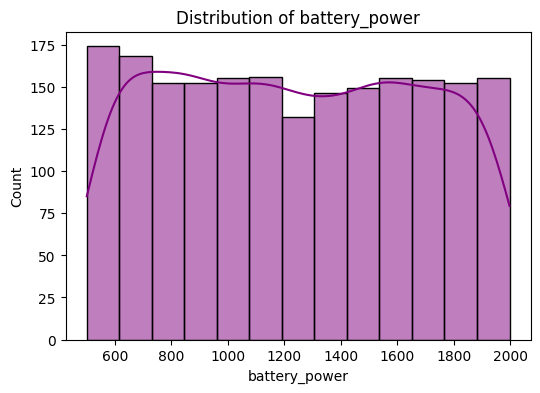

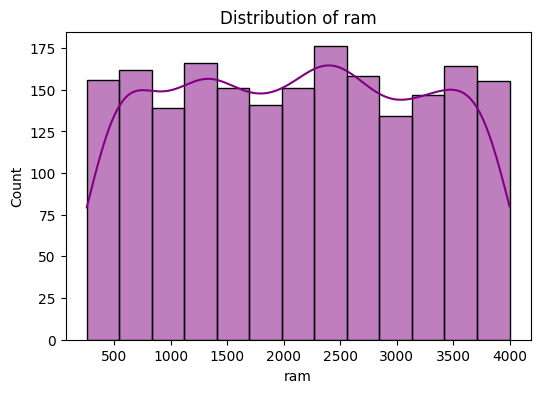

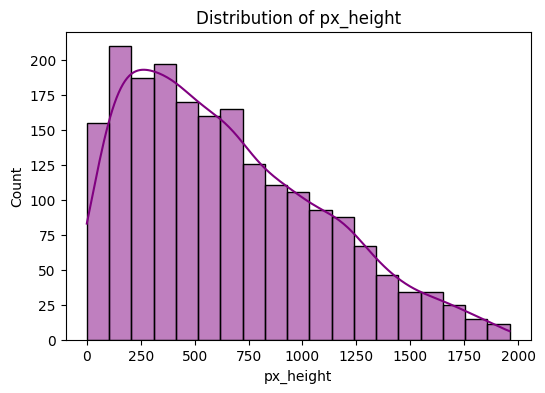

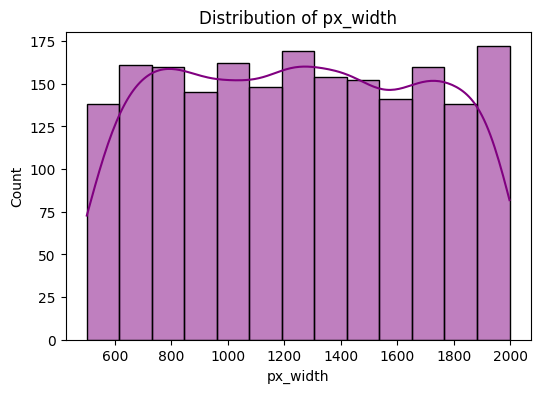

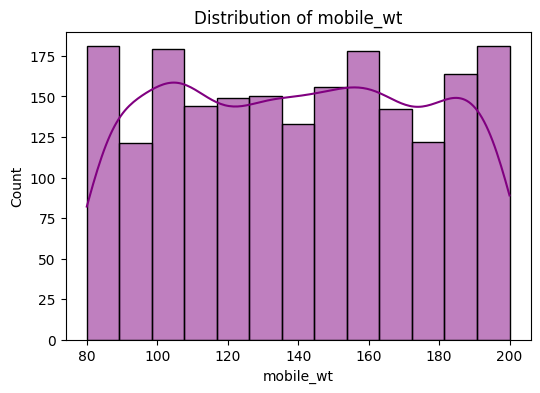

In [198]:
ess_cols = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt']

for col in ess_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(nou[col], kde=True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.show()

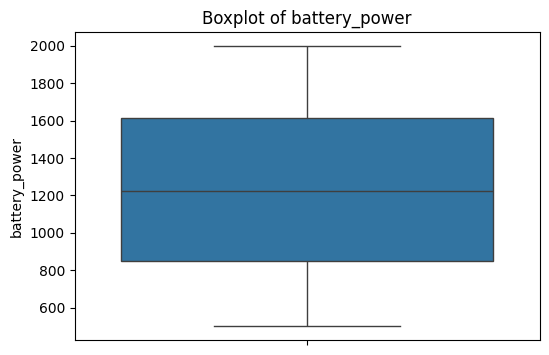

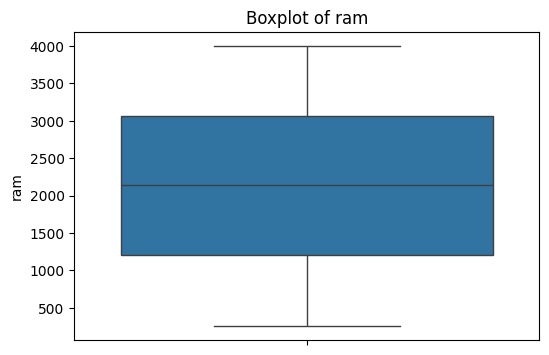

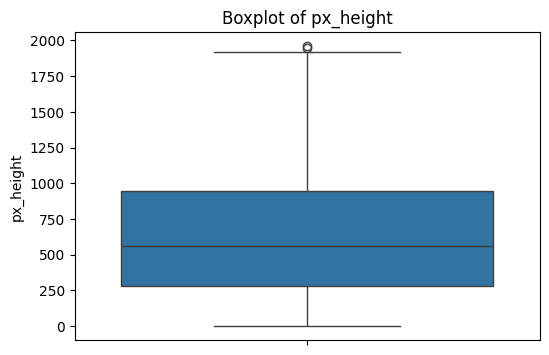

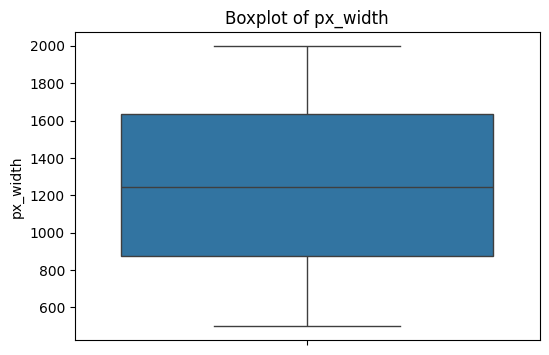

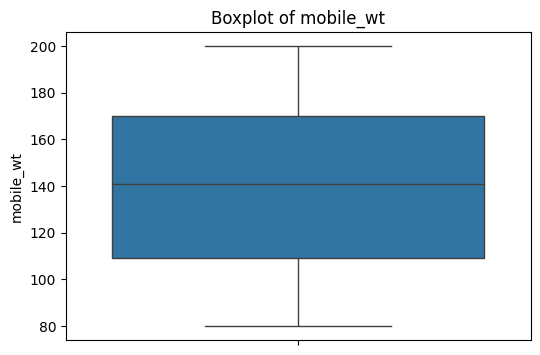

In [199]:
# Outliers graph
for col in ess_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=nou[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [200]:
#New feature >> total pixel resolution (px_area)
nou['px_area'] = nou['px_height'] * nou['px_width']

#New feature >> screen size area
nou['screen_area'] = nou['sc_h'] * nou['sc_w']

#New feature >> battery per weight ratio
nou['battery_per_weight'] = nou['battery_power'] / nou['mobile_wt']

print("\nNew features added: ['px_area', 'screen_area', 'battery_per_weight']")
print(nou.head())


New features added: ['px_area', 'screen_area', 'battery_per_weight']
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  sc_h  sc_w  talk_time  three_g  touch_screen  \
0        188        2  ...     9     7         19        0             0   
1        136        3  ...    17     3          7        1             1   
2        145        5  ...    11     2          9        1             1   
3        131        6  ...    16     8         11        1             0   
4        141        2  ...     8     2         15        1           

In [201]:
#Remove extreme outliers from px_height and px_width
#Cap values above the 99th percentile

for col in ['px_height', 'px_width', 'battery_power', 'ram']:
    upper_limit = nou[col].quantile(0.99)
    nou[col] = np.where(nou[col] > upper_limit, upper_limit, nou[col])

print("\nExtreme outliers clipped (99th percentile)")


Extreme outliers clipped (99th percentile)


In [202]:
X = nou.drop('price_range', axis=1)
y = nou['price_range']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (2000, 23)
Target Shape: (2000,)


#  Feature Scaling
Applying StandardScaler to normalize all features to have mean 0 and variance 1.


In [203]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (1600, 23)
Validation set shape: (400, 23)


In [204]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training features and transform both train and validation
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [205]:
# Train Logistic Regression again on scaled data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [206]:
# Predict and evaluate
y_pred_lr = lr_model.predict(X_val_scaled)

In [207]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Validation Accuracy (after scaling): {accuracy_lr*100:.2f}%")

Logistic Regression Validation Accuracy (after scaling): 96.75%


## Checking for Overfitting or Underfitting

In [208]:
# Accuracy on Training Set
train_predictions = lr_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# Accuracy on Validation Set
val_accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Training Accuracy: 97.19%
Validation Accuracy: 96.75%
